<a href="https://colab.research.google.com/github/sun9huni/first-repository/blob/main/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5(%ED%9A%8C%EA%B7%80)_0514.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀
흔히 다중 선형회귀 사용 ( feature 두 개 이상)



## 비용함수
- 데이터와 모델 간의 거리 계산
- 비용함수, 손실함수, 목적함수라고도 불림
- error 오차 계산 ( 실제값과 예측값의 차이)
- 평균 제곱 오차를 최소화하는 파라미터를 찾는다.

## 경사하강법
- 오차를 찾아 나가는 방식
- 비용함수의 기울기 절대값이 가장 작은 지점을 찾아 오차가 작은 모델 만든다.

In [2]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
# 데이터 생성
from sklearn.datasets import load_diabetes

def make_dataset():
  dataset = load_diabetes()
  df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
  df['target'] = dataset.target
  X_train, X_test, y_train,y_test = train_test_split(
      df.drop('target', axis = 1), df['target'], test_size = 0.2, random_state = 42  )
  return X_train, X_test, y_train,y_test

X_train, X_test, y_train,y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [13]:
# 선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)


2900.193628493482

# 릿지 회귀
오버피팅 문제로 regularization 적용 모델
L2 규제
파라미터(alpha) 값을 활용해 조절
alpha 값이 커질수록 회귀 계수 값을 작게 만듦

In [16]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge(alpha = 1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3077.41593882723

In [17]:
# 회귀 계수
coef = pd.DataFrame(data = model.coef_, index = X_train.columns, columns = ['alpha1'])
coef

,alpha1
age,45.367377
sex,-76.666086
bmi,291.338832
bp,198.995817
s1,-0.530310
s2,-28.577050
s3,-144.511905
s4,119.260066
s5,230.221608
s6,112.149830


In [19]:
# 릿지회귀 (alpha = 10)
model = Ridge(alpha = 10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4443.95263666302

In [21]:
# 회귀 계수 (alpha 10)
coef['alpha10'] = model.coef_
coef

,alpha1,alpha10
age,45.367377,18.229623
sex,-76.666086,-3.277536
bmi,291.338832,65.128417
bp,198.995817,48.219668
s1,-0.530310,16.238315
s2,-28.577050,10.861055
s3,-144.511905,-39.208913
s4,119.260066,41.438568
s5,230.221608,57.950124
s6,112.149830,39.359401


In [25]:
# 릿지회귀 (alpha = 0.05)
model = Ridge(alpha = 0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2866.3095342230863

In [26]:
# 회귀계수 (alpha 0.05)
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha10,alpha0.05
age,45.367377,18.229623,42.238436
sex,-76.666086,-3.277536,-221.865478
bmi,291.338832,65.128417,528.894637
bp,198.995817,48.219668,329.557116
s1,-0.530310,16.238315,-167.087561
s2,-28.577050,10.861055,-58.771286
s3,-144.511905,-39.208913,-172.567918
s4,119.260066,41.438568,162.731028
s5,230.221608,57.950124,428.436699
s6,112.149830,39.359401,68.574693


#라쏘 회귀
오버피팅 문제로 regularization을 적용한 모델
L1 규제( 중요한 피처만 선택)
L2에 비해 회귀 계수를 급격히 감소시켜 중요하다고 생각하는 피처만 선택하고 나머지는 0으로 만듦

In [27]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso(alpha = 1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test,pred)

3403.5757216070733

In [28]:
# 회귀계수
coef = pd.DataFrame(data = model.coef_, index = X_train.columns, columns = ['alpha1'])
coef

,alpha1
age,0.000000
sex,-0.000000
bmi,413.431848
bp,34.830515
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,258.152894
s6,0.000000


In [30]:
# 라쏘 회귀 (alpha = 2)
model = Lasso(alpha = 2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

5010.9350838338805

In [31]:
# 회귀 계수 (alpha = 2)
coef['alpha2'] = model.coef_
coef

,alpha1,alpha2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,413.431848,101.161526
bp,34.830515,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,258.152894,0.000000
s6,0.000000,0.000000


In [32]:
# 라쏘 회귀 (alpha = 0.05)
model = Lasso(alpha = 0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2821.2485185844794

In [33]:
# 회귀 계수 (alpha = 0.05)
coef['alpha0.05'] = model.coef_
coefb

,alpha1,alpha2,alpha0.05
age,0.000000,0.000000,12.519070
sex,-0.000000,0.000000,-193.101685
bmi,413.431848,101.161526,554.975872
bp,34.830515,0.000000,323.098373
s1,0.000000,0.000000,-166.922812
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-195.132612
s4,0.000000,0.000000,65.843890
s5,258.152894,0.000000,473.206946
s6,0.000000,0.000000,43.473932


# 엘라스틱넥 회귀
오버피팅 문제로 regularization을 적용한 모델
규제 방식: L2 L1 규제 결합
시간 소요


In [34]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

5311.21282167187

In [35]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.0001, l1_ratio = 0.6b)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2879.6588672806693

# 랜덤포레스트 & XGBoost

랜덤포레스트
- 여러개의 의사결정 트리로 구성
- 앙상블 중 bagging
- bootstrap sampling
- 최종 Voting

XGBoost
- 트리 앙상블 중 성능이 좋은 알고리즘
- eXtreme GradientBoosting
- 약한 학습기가 계속 업데이트하며 좋은 모델 만든다.

In [37]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3043.861587640449

In [39]:
# XGBoost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3351.001637862091

# 하이퍼파라미터 튜닝
model_selection의 GridSearchCV와 RandomizedSearchCV를 이용해 최적화
1. GridSearchCV - 최적의 하이퍼파라미터 찾기
2. RandomizedSEarchCV - 랜점으로 N개의 조합만 탐색
(시간 내 최적의 하이퍼파라미터 탐색)

데이터셋 로드

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [44]:
# 하이퍼파라미터
# 시간이 오래 결러 learning_rate와 sub_sample는 주석 처리
params ={'learning_rate':[0.07, 0.05],
         'max_depth':[3,5,7],
         'n_estimators':[100,200],
         'subsample':[0.8,0.7]
        }

In [45]:
# 데이터 로드
def make_dataset2():
  dataset = load_diabetes()
  df = pd.DataFrame(dataset.
                    data, columns = dataset.feature_names)
  df['target'] = dataset.target
  return df.drop('target', axis = 1), df['target']
X, y = make_dataset2()

GridSearchCV

In [46]:
xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv = 3, n_jobs = -1)
grid.fit(X,y)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 0.7]})

In [47]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}

In [48]:
# 하이퍼파라미터 튜닝
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 100,
    subsample = 0.7
)
xgb.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3351.001637862091

RandomizedSearchCV

In [51]:
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv = 3, n_iter = 10, n_jobs = -1)
grid.fit(X,y)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.07, 0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 0.7]})

In [52]:
grid.best_params_

{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}

# 평가 (회귀)

*   MAE (Mean Absolute Error) 평균 절대 오차
*   MSE (Mean Squared Erroe) 평균 제곱 오차
*   RMSE (Root Mean Squared Error) 루트 MSE
*   RMSLE (Root Mean Squared Log Error) RMSE에 로그 적용

*   R2 (R Squared Score) 결정계수 -> 1에 가까울수록 성능이 좋음


In [53]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

46.38896564955122

In [56]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

3351.001637862091

In [58]:
# RMSE
import numpy as np
np.sqrt(mean_squared_error(y_test, pred))

np.float64(57.88783670048563)

In [60]:
# RMSLE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, pred))

np.float64(0.4426545707232844)

In [61]:
# R2
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.3675149756138415

# 책 실습

## sklearn LinearRegression 이용한 보스턴 주택 가격 예측

In [4]:
# fit_intercept -> 절편 계산 유무
# normalize -> 회귀 수행 전 입력 데이터 세트 정규화
# coef_ -> 매서드 수행 시 회귀 계수가 배열 형태로 저장되는 속성, Shape는 (Target값 개수, 피처 개수)
# intercept_ -> 절편 값
class sklearn.linear_model.LinearRegresion(fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1 )

SyntaxError: invalid syntax (<ipython-input-4-a72ac9abcce1>, line 1)

In [6]:
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# import를 다른걸로 바꿔주고
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
# 이 부분 두개가 카테고리 데이터로 되어있어서 수치형으로 변환해주세요!
bostonDF['RAD'] = pd.to_numeric(bostonDF['RAD'], errors='coerce')
bostonDF['CHAS'] = pd.to_numeric(bostonDF['CHAS'], errors='coerce')

bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [9]:
bostonDF['PRICE'] = boston.target
print('Boston 데이터 크기:', bostonDF.shape)

Boston 데이터 크기: (506, 14)


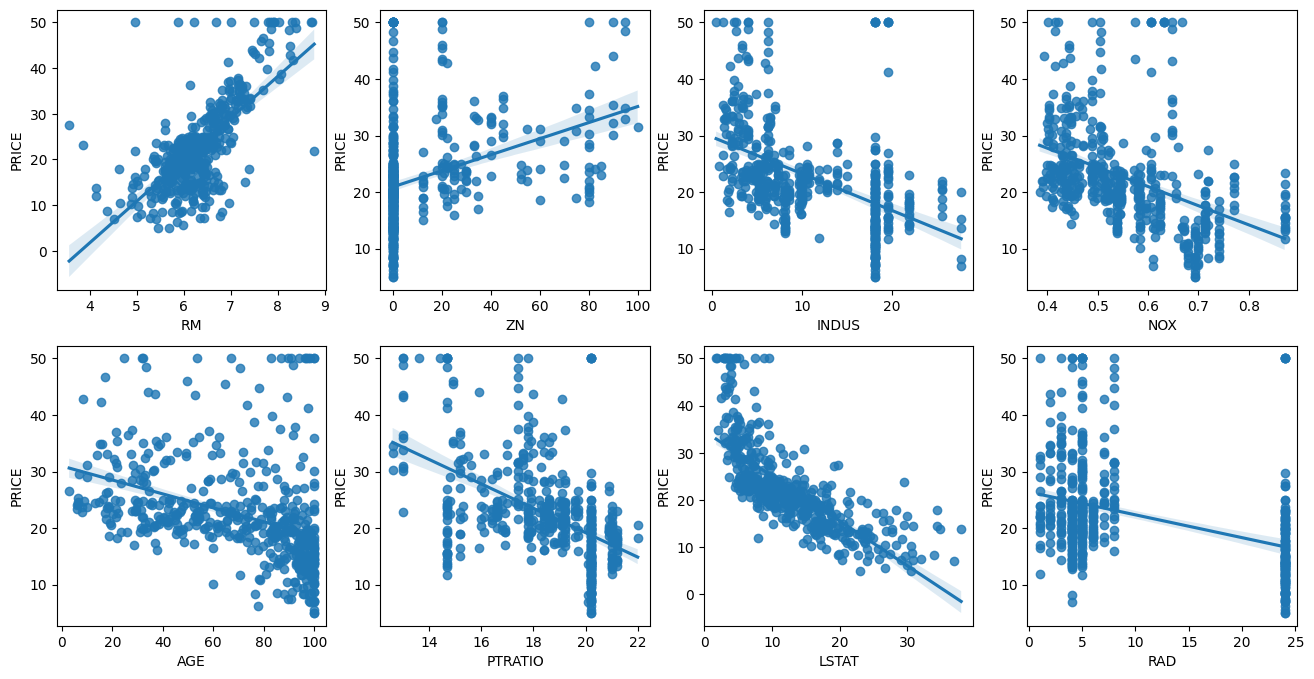

In [13]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4x2개의 ax를 가진다.
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 사본 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 42)

# 선형 회귀 OLS로 학습/ 예측/ 평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 21.517, RMSE : 4.639
Variance score : 0.711


In [21]:
lr.intercept_

np.float64(31.631084035693327)

In [20]:
np.round(lr.coef_,1)

array([ -0.1,   0. ,   0. ,   3.1, -15.4,   4.1,  -0. ,  -1.4,   0.2,
        -0. ,  -0.9,   0. ,  -0.5])

In [23]:
# 회귀계쑤를 큰 값 순으로 정렬하기 위해 Series로 생성, 인덱스 칼럼명 유의
coeff = pd.Series(data = np.round(lr.coef_,1), index = X_data.columns)
coeff.sort_values(ascending = False)

,0
RM,4.1
CHAS,3.1
RAD,0.2
INDUS,0.0
ZN,0.0
B,0.0
TAX,-0.0
AGE,-0.0
CRIM,-0.1
LSTAT,-0.5


In [25]:
# 5개의 폴드 세트에서 cross_val_score 이용해 교차점증으로 MSE와 RMSE 측정

from sklearn.model_selection import cross_val_score
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis = 1, inplace = False)
lr = LinearRegression()

neg_mse_scores = cross_val_score = cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt( -1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(np.round(neg_mse_scores,2))
print(np.round(rmse_scores, 2))
print(avg_rmse)

[-12.46 -26.05 -33.07 -80.76 -33.31]
[3.53 5.1  5.75 8.99 5.77]
5.828658946215802


다항회귀와 과대적합/ 과소적합

sklearn은 PolynomialFeature 클래스를 통해 feature를 Polynomial로 변환
fit(), transform()을 통해 변환 작업 수행

편향 분산 트레이드오프 (Bias-Variance Trade off)

릿지회귀

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 릿지 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring= "neg_mean_squared_error", cv = 5)
rsme_scores = np.sqrt( -1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [27]:
print(np.round(neg_mse_scores,3))
print(np.round(rmse_scores, 3))
print(avg_rmse)

[-11.422 -24.294 -28.144 -74.599 -28.517]
[3.53  5.104 5.751 8.987 5.772]
5.828658946215802


릿지회귀는 alpha 값이 커질수록 회귀 계수 값을 작게 만든다.
alpha 값을 계속 증가시ㅣㄹ수록 회귀 계수 값은 지속적으로 작아진다.
하지만 릿지회귀의 경우 회귀계수를 0으로 만들지 않는다.

# 라쏘회귀

L1 규제 - 불필요한 회귀 계수를 0으로 만들고 제거

In [30]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None,
                        verbose = True, return_coeff = True):
  coeff_df = pd.DataFrame()
  if verbose : print ('#######', model_name, '#######')
  for param in params:
    if model_name == 'Ridge' : model = Ridge(alpha = param)
    elif model_name == 'Lasso' : model = Lasso(alpha = param)
    elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio = 0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv = 5)

    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print ('alpha {0}일 때  5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

    model.fit(X_data_n, y_target_n)
    if return_coeff:
      # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 columns으로 추가.
      coeff = pd.Series(data = model.coef_ , index = X_data_n.columns)
      colname = 'alpha:' + str(param)
      coeff_df[colname] = coeff
  return coeff_df
# end of get_linear_regre_eval

In [31]:
#라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 추출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

####### Lasso #######
alpha 0.07일 때  5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때  5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때  5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때  5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때  5 폴드 세트의 평균 RMSE: 6.189


In [33]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column , ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


# 엘라스틱넷 회귀

In [34]:
# 엘라스틱넷에 사용될 alpha parameter 값들을 정의하고 get_linear_reg_eval()함수 호출
# l1_ratio = 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas,
                                       X_data_n = X_data, y_target_n = y_target)


####### ElasticNet #######
alpha 0.07일 때  5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때  5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때  5 폴드 세트의 평균 RMSE: 5.467
alpha 1일 때  5 폴드 세트의 평균 RMSE: 5.597
alpha 3일 때  5 폴드 세트의 평균 RMSE: 6.068


In [36]:
# 반환된 coeff_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:' +  str(elastic_alphas[0])
coeff_elastic_df.sort_values( by = sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


alpha 0.5일 때 가장 좋은 예측 성능

# 선형 회귀 모델을 위한 데이터 변환

일반적으로 중요 피처들이나 타깃값의 분포도가 심하게 왜곡됐을 때 변환 작업 수행

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# methods는 표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그 변환 결정
# p_degree는 다항식의 특성을 추가할 때 적용, p_degree는 2 이상 부여하지 않음.

def get_scaled_data(method = 'None', p_degree = None, input_data = None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data

  if p_degree != None:
    scaled_data = PolynomialFeatures(degree = p_degree, include_bias = False).fit_transform(scaled_data)

  return scaled_data


In [42]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환, 원본, 표준정규 분포, 표준정규 분포 + 다항식 특성
# 최대/최소 정규화, 최대/최소 정규화 + 다항식 특성, 로그 변환

scale_methods = [(None, None), ('Standard', None),('Standard',2),('MinMax',None),('MinMax',2),('Log',None)]
for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1], input_data = X_data)
  print('\n## 변환 유형: {0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge', params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose = False, return_coeff = False)


## 변환 유형: None, Polynomial Degree:None
alpha 0.1일 때  5 폴드 세트의 평균 RMSE: 5.788
alpha 1일 때  5 폴드 세트의 평균 RMSE: 5.653
alpha 10일 때  5 폴드 세트의 평균 RMSE: 5.518
alpha 100일 때  5 폴드 세트의 평균 RMSE: 5.330

## 변환 유형: Standard, Polynomial Degree:None
alpha 0.1일 때  5 폴드 세트의 평균 RMSE: 5.826
alpha 1일 때  5 폴드 세트의 평균 RMSE: 5.803
alpha 10일 때  5 폴드 세트의 평균 RMSE: 5.637
alpha 100일 때  5 폴드 세트의 평균 RMSE: 5.421

## 변환 유형: Standard, Polynomial Degree:2
alpha 0.1일 때  5 폴드 세트의 평균 RMSE: 8.827
alpha 1일 때  5 폴드 세트의 평균 RMSE: 6.871
alpha 10일 때  5 폴드 세트의 평균 RMSE: 5.485
alpha 100일 때  5 폴드 세트의 평균 RMSE: 4.634

## 변환 유형: MinMax, Polynomial Degree:None
alpha 0.1일 때  5 폴드 세트의 평균 RMSE: 5.764
alpha 1일 때  5 폴드 세트의 평균 RMSE: 5.465
alpha 10일 때  5 폴드 세트의 평균 RMSE: 5.754
alpha 100일 때  5 폴드 세트의 평균 RMSE: 7.635

## 변환 유형: MinMax, Polynomial Degree:2
alpha 0.1일 때  5 폴드 세트의 평균 RMSE: 5.298
alpha 1일 때  5 폴드 세트의 평균 RMSE: 4.323
alpha 10일 때  5 폴드 세트의 평균 RMSE: 5.185
alpha 100일 때  5 폴드 세트의 평균 RMSE: 6.538

## 변환 유형: Log, Polynomial Degree:None
alpha 0.1일

# 로지스틱 회귀
시그모이드 함수 최적선을 찾고 반환값을 확률로 간주해 확률에 따라 분류를 결정

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

로지스틱 회귀를 이용해 학습 및 예측을 수행하고 정확도와 roc_auc 값 구하기

In [45]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
# solver인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression() # solver='lbfgs'
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds),
                                                 roc_auc_score(y_test , lr_preds_proba)))

accuracy: 0.977, roc_auc:0.995


서로 다른 solver 값으로 학습 및 성능 평가
max_iter는 600으로 설정 - solver로 지정된 최적화 알고리즘이 최적 수렴할 수 있는 최대 반복횟수

In [46]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
# 여러개의 solver값 별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver,
                                                                  accuracy_score(y_test, lr_preds),
                                                                  roc_auc_score(y_test , lr_preds_proba)))

solver:lbfgs, accuracy: 0.977, roc_auc:0.995
solver:liblinear, accuracy: 0.982, roc_auc:0.995
solver:newton-cg, accuracy: 0.977, roc_auc:0.995
solver:sag, accuracy: 0.982, roc_auc:0.995
solver:saga, accuracy: 0.982, roc_auc:0.995


solver와 max_iter 이외에 하이퍼파라미터
penalty - 기본 12(L2), 11(L1)
C는 규제 강도를 조절하는 alpha값의 역수이다. = 1 / alpha
C가 작을수록 규제 강도가 크다.


In [47]:
# GridSearchCV를 이용해 최적화
from sklearn.model_selection import GridSearchCV

params={'solver':['liblinear', 'lbfgs'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


# 회귀 트리
- 회귀를 위한 트리를 생성하고 회귀 예측
- 분류트리는 측정 클래스를 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값을 평균값을 구해 회귀 예측값 계산

In [52]:
# RandomForestRegressor이용해 보스턴 주택 가격 예측 수행
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# import를 다른걸로 바꿔주고
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
# 이 부분 두개가 카테고리 데이터로 되어있어서 수치형으로 변환해주세요!
bostonDF['RAD'] = pd.to_numeric(bostonDF['RAD'], errors='coerce')
bostonDF['CHAS'] = pd.to_numeric(bostonDF['CHAS'], errors='coerce')

bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [53]:
bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423 


In [54]:
# 결정트리, GBM, XGBoost, LightGBM 회귀 모두 이용해 수행

def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [55]:
# 다양한 유형의 회귀 트리를 생성하고, 이를 이용해 보스턴 주택 가격 예측

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
# feature_importances_ 이용해 보스턴 주택 가격 모델의 피처별 중요도 시각화

<Axes: xlabel='None', ylabel='None'>

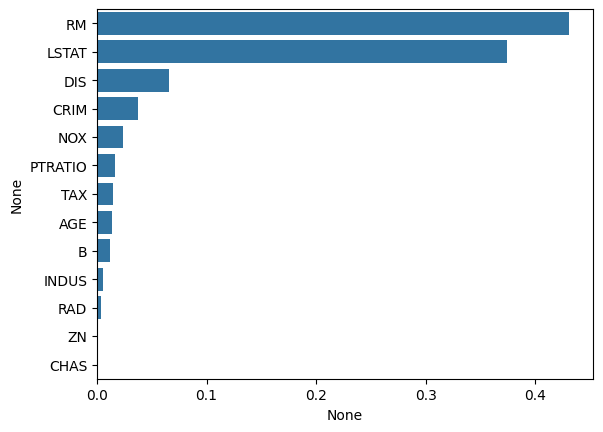

In [57]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000b)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

보스턴 데이터 100개만 샘플링 후 RM과 PRICE 칼럼만 투툴해 X,Y로 두고 산점도로 시각화

(100, 2)


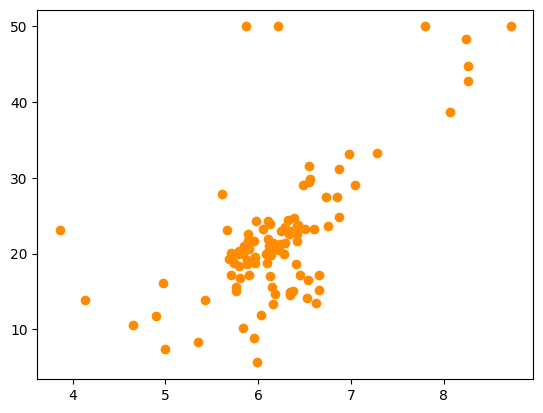

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

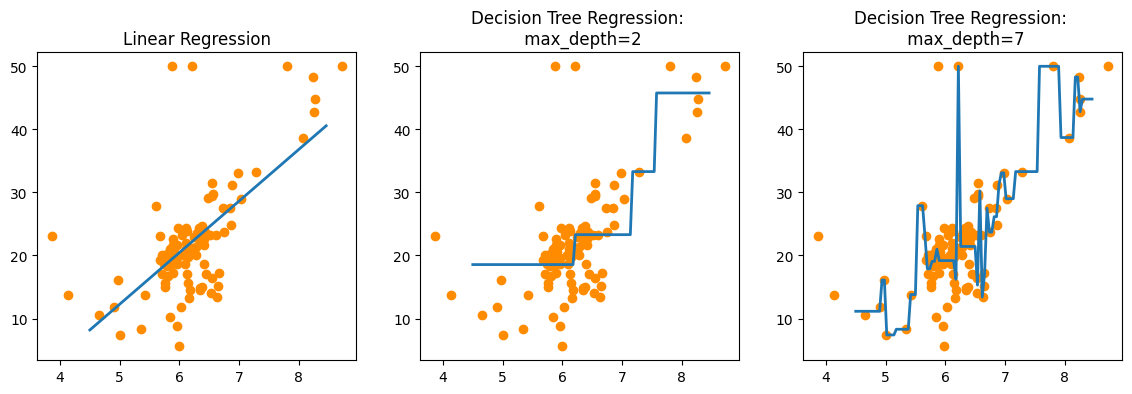

In [60]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

- 선형회귀는 직선으로 예측 회귀선을 표현
- 회귀트리는 분할되는 데이터 지점에 따라 브랜치를 만들며 계단 형태의 회귀선
- DecisionTreeRegressor의 max_depth=7인 경우 outlier 학습하면서 복잡한 형태로 과적합되기 쉬운 모델